# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pt

In [2]:
# Detect and read with correct encoding
files = {
    "aqi": "../data/raw/aqi.csv",
    "idsp": "../data/raw/idsp.csv",
    "pp": "../data/raw/population_projection.csv",
    "vahan": "../data/raw/vahan.csv",
}

In [3]:
import chardet

def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read(100000))
    return result['encoding']

def safe_read_csv(path):
    try:
        encoding = detect_encoding(path)
        return pd.read_csv(path, encoding=encoding)
    except UnicodeDecodeError:
        # fallback to utf-8 or latin1 if detected encoding fails
        try:
            return pd.read_csv(path, encoding='utf-8')
        except UnicodeDecodeError:
            return pd.read_csv(path, encoding='latin1')

aqi_df = safe_read_csv(files["aqi"])
idsp_df = safe_read_csv(files["idsp"])
pp_df = safe_read_csv(files["pp"])
vahan_df = safe_read_csv(files["vahan"])

print("AQI DataFrame")
display(aqi_df.head())

print("IDSP DataFrame")
display(idsp_df.head())

print("population_projection DataFrame")
display(pp_df.head())

print("Vahan DataFrame")
display(vahan_df.head())

AQI DataFrame


,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status,unit,note
0,30-04-2025,Maharashtra,Amravati,2,PM10,78,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
1,30-04-2025,Bihar,Purnia,1,CO,56,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
2,30-04-2025,Madhya Pradesh,Katni,1,O3,98,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
3,30-04-2025,Chhattisgarh,Tumidih,1,PM10,103,Moderate,number_of_monitoring_stations in Absolute Numb...,NaN
4,30-04-2025,Assam,Byrnihat,1,PM2.5,61,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN


IDSP DataFrame


,year,week,outbreak_starting_date,reporting_date,state,district,disease_illness_name,status,cases,deaths,unit,note
0,2025,16,15-04-2025,15-04-2025,Andhra Pradesh,Kakinada,Acute Diarrheal Disease,Reported,22,0,"cases in absolute number, deaths in absolute n...",NaN
1,2025,16,15-04-2025,17-04-2025,Assam,Biswanath,Chickenpox,Reported,1,1,"cases in absolute number, deaths in absolute n...",NaN
2,2025,16,19-04-2025,20-04-2025,Assam,Dhemaji,Food Poisoning,Reported,16,0,"cases in absolute number, deaths in absolute n...",NaN
3,2025,16,19-04-2025,19-04-2025,Bihar,Gopalganj,Fever with Rash,Reported,5,0,"cases in absolute number, deaths in absolute n...",NaN
4,2025,16,12-04-2025,15-04-2025,Bihar,Madhubani,Acute Diarrheal Disease,Reported,21,0,"cases in absolute number, deaths in absolute n...",NaN


population_projection DataFrame


,year,month,state,gender,value,unit,note
0,2036,October,West Bengal,Total,43964,value in Thousands,NaN
1,2036,October,West Bengal,Male,22615,value in Thousands,NaN
2,2036,October,West Bengal,Female,21349,value in Thousands,NaN
3,2036,October,Uttarakhand,Total,5506,value in Thousands,NaN
4,2036,October,Uttarakhand,Male,2922,value in Thousands,NaN


Vahan DataFrame


,year,month,state,rto,vehicle_class,fuel,value,unit,note
0,2025,April,Andaman and Nicobar Islands,All Vahan Running Office,BUS,DIESEL,2,value in Absolute Number,NaN
1,2025,April,Andaman and Nicobar Islands,All Vahan Running Office,GOODS CARRIER,DIESEL,23,value in Absolute Number,NaN
2,2025,April,Andaman and Nicobar Islands,All Vahan Running Office,GOODS CARRIER,PETROL,1,value in Absolute Number,NaN
3,2025,April,Andaman and Nicobar Islands,All Vahan Running Office,M-CYCLE/SCOOTER,ELECTRIC(BOV),1,value in Absolute Number,NaN
4,2025,April,Andaman and Nicobar Islands,All Vahan Running Office,M-CYCLE/SCOOTER,PETROL,387,value in Absolute Number,NaN


## 📅 Why Standardize Date Columns in AQI & IDSP Datasets?

### Problem
- The `date` column in **AQI** and the `reporting_date`/`outbreak_starting_date` columns in **IDSP** are currently stored as text (string/object).
- Inconsistent date formats or non-datetime types can cause errors or unexpected results when filtering, grouping, or analyzing by date.

### Why This Matters for Analysis
- **Accurate Time-Based Analysis:**  
  Operations like monthly/yearly trends, time series plots, or calculating durations require true datetime types.
- **Reliable Filtering & Grouping:**  
  Filtering for a specific period (e.g., "all data from 2023") or grouping by month/year only works correctly if dates are standardized.
- **Data Quality & Consistency:**  
  Ensures all downstream processes (dashboards, reports, ML models) interpret dates the same way.

### Executive Summary
> **To enable robust, error-free analysis and reporting, we must convert all date columns in our AQI and IDSP datasets to a consistent datetime format. This step is essential for any time-based insights, trend analysis, or accurate filtering by date.**

In [4]:
# Standardize date columns in AQI and IDSP datasets only if not already datetime

def ensure_datetime(df, col, dayfirst=True):
  if col in df.columns:
    if not pd.api.types.is_datetime64_any_dtype(df[col]):
      try:
        df[col] = pd.to_datetime(df[col], dayfirst=dayfirst, errors='coerce')
        print(f"Standardized '{col}' to datetime.")
      except Exception as e:
        print(f"Could not convert '{col}' to datetime: {e}")
    else:
      print(f"'{col}' is already datetime.")
  else:
    print(f"Column '{col}' not found in DataFrame.")

# AQI: 'date'
ensure_datetime(aqi_df, 'date', dayfirst=True)

# IDSP: 'reporting_date' and 'outbreak_starting_date'
ensure_datetime(idsp_df, 'reporting_date', dayfirst=True)
ensure_datetime(idsp_df, 'outbreak_starting_date', dayfirst=True)

Standardized 'date' to datetime.
Standardized 'reporting_date' to datetime.
Standardized 'outbreak_starting_date' to datetime.


In [5]:
aqi_df.head()

,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status,unit,note
0,2025-04-30,Maharashtra,Amravati,2,PM10,78,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
1,2025-04-30,Bihar,Purnia,1,CO,56,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
2,2025-04-30,Madhya Pradesh,Katni,1,O3,98,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
3,2025-04-30,Chhattisgarh,Tumidih,1,PM10,103,Moderate,number_of_monitoring_stations in Absolute Numb...,NaN
4,2025-04-30,Assam,Byrnihat,1,PM2.5,61,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN


## 📊 Dataset: AQI (Air Quality Indexing)

### ✅ What does each row represent?

Each row in this dataset represents a **daily air quality measurement** for a specific **area (city/locality)** in **India**.
It records the AQI value, prominent pollutant, number of monitoring stations, and a categorization of the air quality status for that day.

> 📝 **Example:**
> On `30-04-2025`, in `Amravati` (Maharashtra), the AQI was `78`, classified as **Satisfactory**, and the most prominent pollutant was **PM10**.

---

### 📋 Column Descriptions

| Column Name                     | Description                                                                 |
| ------------------------------- | --------------------------------------------------------------------------- |
| `date`                          | Date when the AQI reading was recorded (`dd-mm-yyyy`)                       |
| `state`                         | Name of the state where the air quality station is located                  |
| `area`                          | Specific area, city, or town within the state                               |
| `number_of_monitoring_stations` | Number of AQI monitoring stations contributing to the reading               |
| `prominent_pollutants`          | The pollutant most responsible for the AQI value on that date               |
| `aqi_value`                     | Numerical AQI score (ranges from 0 to 500+)                                 |
| `air_quality_status`            | Categorical status based on AQI value (e.g., Good, Satisfactory, Poor)      |
| `unit`                          | Describes the unit of measurement — here refers to monitoring station count |
| `note`                          | Additional notes or metadata (mostly null in this dataset)                  |

---

### 📐 Metrics vs Dimensions

| Metrics (Quantitative)                  | Dimensions (Qualitative/Categorical) |
| --------------------------------------- | ------------------------------------ |
| `aqi_value`                             | `state`                              |
| `number_of_monitoring_stations`         | `area`                               |
| *(can count)* `air_quality_status`      | `date`                               |
| *(can group by)* `prominent_pollutants` | `prominent_pollutants`               |

---

### 💡 Example Questions This Data Can Help Answer

* Which cities consistently report **high AQI**?
* What are the **top pollutants** across different Indian states?
* Is **air quality better on weekends** than weekdays in metro cities?
* Which months or states experience **peak pollution** levels?
* How many days in a given area had **Poor or Worse** air quality?

---

### 🛑 Limitations

* The dataset does not include **time of day** (only date).
* Latitude/longitude coordinates are not provided.
* Some entries in `note` and `unit` columns are missing or inconsistent.
* Does not account for AQI exposure duration (just snapshots per day).

---

### 🔁 Update Frequency

This dataset appears to be a **daily snapshot** dataset, collected from government AQI sources.
Your current file includes data from **2022 to 2025** (historical period).

# Understanding IDSP Dataset and conceptualizing later


In [6]:
idsp_df.head()

,year,week,outbreak_starting_date,reporting_date,state,district,disease_illness_name,status,cases,deaths,unit,note
0,2025,16,2025-04-15,2025-04-15,Andhra Pradesh,Kakinada,Acute Diarrheal Disease,Reported,22,0,"cases in absolute number, deaths in absolute n...",NaN
1,2025,16,2025-04-15,2025-04-17,Assam,Biswanath,Chickenpox,Reported,1,1,"cases in absolute number, deaths in absolute n...",NaN
2,2025,16,2025-04-19,2025-04-20,Assam,Dhemaji,Food Poisoning,Reported,16,0,"cases in absolute number, deaths in absolute n...",NaN
3,2025,16,2025-04-19,2025-04-19,Bihar,Gopalganj,Fever with Rash,Reported,5,0,"cases in absolute number, deaths in absolute n...",NaN
4,2025,16,2025-04-12,2025-04-15,Bihar,Madhubani,Acute Diarrheal Disease,Reported,21,0,"cases in absolute number, deaths in absolute n...",NaN


### 📊 Conceptualizing the IDSP Disease Outbreak Dataset

---

#### ✅ Step 1: Clean Explanation of a Single Row

Let’s break it down using **Row 0**:

```
year: 2025  
week: 16  
outbreak_starting_date: 2025-04-15  
reporting_date: 2025-04-15  
state: Andhra Pradesh  
district: Kakinada  
disease_illness_name: Acute Diarrheal Disease  
status: Reported  
cases: 22  
deaths: 0  
unit: cases in absolute number, deaths in absolute number  
note: NaN
```

---

#### 🧠 Conceptual Explanation:

In **Week 16 of 2025**, an **outbreak of Acute Diarrheal Disease** started and was reported on **April 15, 2025** in **Kakinada, Andhra Pradesh**.

* **22 cases** were reported with **0 deaths**, all measured in **absolute numbers**.
* The `status` is **"Reported"**, meaning this outbreak was formally recorded.
* The `unit` column clarifies how `cases` and `deaths` are measured (not per capita).
* The `note` column is often empty and used for metadata purposes.

---

#### 📐 Metrics vs Dimensions

| **Metrics (Measurable Values)**                 | **Dimensions (Descriptive Categories)**          |
| ----------------------------------------------- | ------------------------------------------------ |
| `cases` (Total reported cases)                  | `year`, `week` (When)                            |
| `deaths` (Total reported deaths)                | `state`, `district` (Where)                      |
| `case_fatality_rate = deaths / cases` (derived) | `disease_illness_name` (What disease)            |
| `report_delay = reporting_date - outbreak_date` | `status` (Reported/Confirmed/Suspected)          |
| Count of total outbreaks                        | `disease_illness_name`, `state`, `district`      |
| —                                               | `unit`, `note` (Metadata — not used in analysis) |

---

#### 💡 Example Use Cases

| **Use Case**                               | **Metric(s)**                         | **Grouped By (Dimension)**                                |
| ------------------------------------------ | ------------------------------------- | --------------------------------------------------------- |
| Total cases of each disease in Maharashtra | `sum(cases)`                          | `disease_illness_name`, filtered on `state = Maharashtra` |
| Total deaths due to Chickenpox             | `sum(deaths)`                         | `disease_illness_name = Chickenpox`                       |
| Reporting delays across states             | `avg(reporting_date - outbreak_date)` | `state`, `district`                                       |
| Fatality rate per disease                  | `deaths / cases`                      | `disease_illness_name`                                    |
| Outbreak frequency trend over time         | `count(*)`                            | `week`, `year`                                            |

In [7]:
import pandas as pd
import os

datasets = {
    "aqi": aqi_df,
    "idsp": idsp_df,
    "population_projection": pp_df,
    "vahan": vahan_df
}

# Step 2: Define Issue Detection
issues = []

for table_name, df in datasets.items():
    for col in df.columns:
        # Missing Values
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            issues.append({
                "table": table_name,
                "column": col,
                "issue": "missing values",
                "row count": missing_count,
                "solvable?": "Yes",
                "resolution": "Fill with median/mode or drop"
            })

        # Inconsistent Data Formats: Only check columns that are likely to be dates
        date_col_keywords = ["date", "dt", "timestamp"]
        if any(kw in col.lower() for kw in date_col_keywords):
            try:
                pd.to_datetime(df[col])
            except Exception:
                issues.append({
                    "table": table_name,
                    "column": col,
                    "issue": "inconsistent date formats",
                    "row count": df.shape[0],
                    "solvable?": "Yes",
                    "resolution": "Standardize to datetime"
                })

        # $0 or Negative numeric values (if AQI, deaths, etc.)
        if pd.api.types.is_numeric_dtype(df[col]):
            invalid = (df[col] <= 0).sum()
            if invalid > 0:
                issues.append({
                    "table": table_name,
                    "column": col,
                    "issue": "zero or negative values",
                    "row count": invalid,
                    "solvable?": "Yes",
                    "resolution": "Review outliers or correct"
                })

    # Duplicates
    dup_count = df.duplicated().sum()
    if dup_count > 0:
        issues.append({
            "table": table_name,
            "column": "All",
            "issue": "duplicate rows",
            "row count": dup_count,
            "solvable?": "Yes",
            "resolution": "Drop duplicates"
        })

# Step 3: Save to Data Issue Log
os.makedirs("../data/processed", exist_ok=True)
issues_df = pd.DataFrame(issues)
issues_df.to_csv("../data/processed/data_issue_log.csv", index=False)

## The following table summarizes detected data quality issues across all datasets:

In [8]:
issues_df

,table,column,issue,row count,solvable?,resolution
0,aqi,note,missing values,235785,Yes,Fill with median/mode or drop
1,idsp,reporting_date,missing values,1019,Yes,Fill with median/mode or drop
2,idsp,district,missing values,1,Yes,Fill with median/mode or drop
3,idsp,disease_illness_name,missing values,5,Yes,Fill with median/mode or drop
4,idsp,cases,zero or negative values,6,Yes,Review outliers or correct
5,idsp,deaths,zero or negative values,5672,Yes,Review outliers or correct
6,idsp,note,missing values,6468,Yes,Fill with median/mode or drop
7,population_projection,note,missing values,8892,Yes,Fill with median/mode or drop
8,vahan,note,missing values,64841,Yes,Fill with median/mode or drop


## 📝 Data Quality Issue Report

### Key Observations

- **Missing Values:**  
  - The `note` column is entirely missing in all datasets and can be dropped or imputed if needed.
  - Some critical columns in `idsp` (e.g., `reporting_date`, `district`, `disease_illness_name`) have a small number of missing values.

- **Zero or Negative Values:**  
  - The `cases` and `deaths` columns in `idsp` contain zero or negative values, which may indicate data entry errors or valid zero counts. These should be reviewed for context.

### Recommendations

- **Imputation:** For columns with few missing values, consider filling with the mode (categorical) or median (numeric).
- **Dropping Columns:** If a column is entirely null (e.g., `note`), it may be dropped unless required for metadata.
- **Outlier Review:** Investigate zero or negative values in `cases` and `deaths` for correctness.
- **Standardization:** Ensure consistent data formats, especially for date columns.

This issue log should be revisited after each cleaning step to track progress and ensure data quality for downstream analysis.

In [9]:
# Impute missing values for columns with few missing values in all datasets

for name, df in datasets.items():
  for col in df.columns:
    missing = df[col].isnull().sum()
    total = len(df)
    # Only impute if there are missing values and not all values are missing
    if 0 < missing < total:
      if pd.api.types.is_numeric_dtype(df[col]):
        # Use median for numeric columns
        median = df[col].median()
        df[col] = df[col].fillna(median)
      else:
        # Use mode for categorical/object columns
        mode = df[col].mode()
        if not mode.empty:
          df[col] = df[col].fillna(mode[0])

# Outlier Review

---

Since we don't want to drop notes columns in `aqi_df` and `idsp_df`, because we can need it for metadata

Now we will see the outlier inside `cases` and `death` ratio for correctness from `idsp_df` using scatter plot and box plot, to understand the data

In [10]:
def get_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return (series < lower_bound) | (series > upper_bound)

# Boolean masks for outliers
cases_outliers = get_outliers(idsp_df["cases"])
deaths_outliers = get_outliers(idsp_df["deaths"])


Outliers in Cases:
      cases  deaths  death_ratio
26      650       0          0.0
30      122       0          0.0
36      129       0          0.0
44      120       0          0.0
45      118       0          0.0
...     ...     ...          ...
6443    105       0          0.0
6450     95       0          0.0
6462     83       0          0.0
6466    207       0          0.0
6473     89       0          0.0

[634 rows x 3 columns]


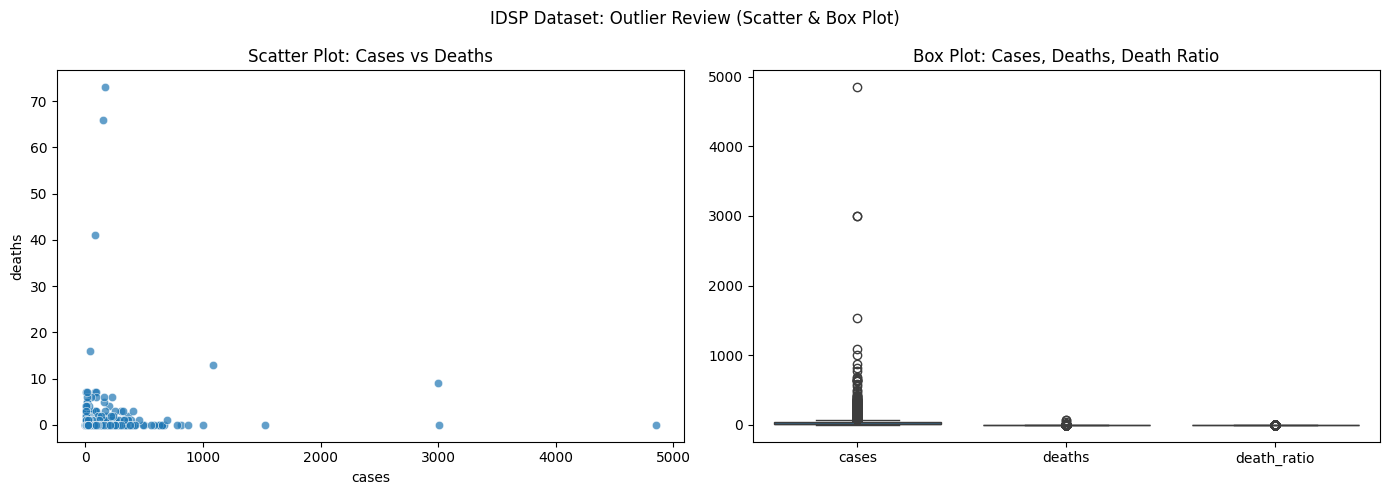

In [11]:
# Find outliers in cases
q1 = idsp_df['cases'].quantile(0.25)
q3 = idsp_df['cases'].quantile(0.75)
iqr = q3 - q1

# Ensure 'death_ratio' column exists
if 'death_ratio' not in idsp_df.columns:
    idsp_df['death_ratio'] = idsp_df['deaths'] / idsp_df['cases'].replace(0, np.nan)

outliers_cases = idsp_df[(idsp_df['cases'] < q1 - 1.5 * iqr) | (idsp_df['cases'] > q3 + 1.5 * iqr)]

print("Outliers in Cases:")
print(outliers_cases[['cases', 'deaths', 'death_ratio']])

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot: Cases vs Deaths
sns.scatterplot(
  x='cases',
  y='deaths',
  data=idsp_df,
  ax=axes[0],
  alpha=0.7
)
axes[0].set_title("Scatter Plot: Cases vs Deaths")

# Box plots: Cases, Deaths, Death Ratio
sns.boxplot(
  data=idsp_df[['cases', 'deaths', 'death_ratio']],
  ax=axes[1],
  showfliers=True
)
axes[1].set_title("Box Plot: Cases, Deaths, Death Ratio")

plt.suptitle("IDSP Dataset: Outlier Review (Scatter & Box Plot)")
plt.tight_layout()
plt.show()


In [12]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# --- Data Setup ---
# Calculate death_ratio if not present
if 'death_ratio' not in idsp_df.columns:
    idsp_df['death_ratio'] = idsp_df['deaths'] / idsp_df['cases'].replace(0, np.nan)

# Melt the DataFrame for plotting
melted = idsp_df[['cases', 'deaths', 'death_ratio']].melt(
    var_name='Metric', value_name='Value'
)

# --- Plotly Subplots Setup ---
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=("Violin Plot", "Box Plot", "Strip Plot"),
    shared_yaxes=True
)

# 1. Violin Plot
for metric in ['cases', 'deaths', 'death_ratio']:
    fig.add_trace(
        go.Violin(
            y=melted[melted['Metric'] == metric]['Value'],
            x=[metric]*len(melted[melted['Metric'] == metric]),
            name=metric,
            box_visible=True,
            meanline_visible=True,
            points='outliers',  # show only outliers
            line_color='blue'
        ),
        row=1, col=1
    )

# 2. Box Plot
for metric in ['cases', 'deaths', 'death_ratio']:
    fig.add_trace(
        go.Box(
            y=melted[melted['Metric'] == metric]['Value'],
            x=[metric]*len(melted[melted['Metric'] == metric]),
            name=metric,
            boxpoints='outliers',
            marker_color='green'
        ),
        row=1, col=2
    )

# 3. Strip Plot (Jittered scatter)
for i, metric in enumerate(['cases', 'deaths', 'death_ratio']):
    y_vals = melted[melted['Metric'] == metric]['Value']
    x_vals = np.random.normal(loc=i, scale=0.1, size=len(y_vals))  # jitter
    fig.add_trace(
        go.Scatter(
            x=[metric]*len(y_vals),
            y=y_vals,
            mode='markers',
            name=metric,
            marker=dict(size=4, opacity=0.5, color='black'),
            showlegend=False
        ),
        row=1, col=3
    )

# --- Layout ---
fig.update_layout(
    title_text="Distribution of Cases, Deaths, Death Ratio",
    height=500, width=1200,
    showlegend=False
)

fig.show()


In [15]:
import sys
import os

# Add the parent directory to sys.path so 'src' can be imported
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.utils.lib import detailed_data_quality_report 

if 'aqi_df' in globals() and 'idsp_df' in globals():
	final_aqi_report = detailed_data_quality_report(aqi_df, "AQI Dataset")
	final_idsp_report = detailed_data_quality_report(idsp_df, "IDSP Dataset")

	display(final_aqi_report)
	display(final_idsp_report)
else:
	print("Please run the earlier cells to define 'aqi_df' and 'idsp_df' before running this cell.")

,Table,Column,Issue,Row Count,Magnitude (%),Solvable?,Resolution Suggestion
0,AQI Dataset,note,Missing Values,235785,100.00,Yes,Impute with mean/median/mode or drop rows
1,AQI Dataset,number_of_monitoring_stations,Outliers,54258,23.01,Yes,"Cap, transform, or remove extreme values"
2,AQI Dataset,aqi_value,Outliers,10934,4.64,Yes,"Cap, transform, or remove extreme values"


,Table,Column,Issue,Row Count,Magnitude (%),Solvable?,Resolution Suggestion
0,IDSP Dataset,death_ratio,Missing Values,6,0.09,Yes,Impute with mean/median/mode or drop rows
1,IDSP Dataset,cases,Outliers,634,9.79,Yes,"Cap, transform, or remove extreme values"
2,IDSP Dataset,deaths,Outliers,802,12.39,Yes,"Cap, transform, or remove extreme values"
3,IDSP Dataset,death_ratio,Outliers,802,12.39,Yes,"Cap, transform, or remove extreme values"


In [20]:
aqi_df.head()

,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status,unit,note
0,2025-04-30,Maharashtra,Amravati,2,PM10,78,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
1,2025-04-30,Bihar,Purnia,1,CO,56,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
2,2025-04-30,Madhya Pradesh,Katni,1,O3,98,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
3,2025-04-30,Chhattisgarh,Tumidih,1,PM10,103,Moderate,number_of_monitoring_stations in Absolute Numb...,NaN
4,2025-04-30,Assam,Byrnihat,1,PM2.5,61,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN


In [19]:
idsp_df.sort_values(by="deaths", ascending=False).head(10)

,year,week,outbreak_starting_date,reporting_date,state,district,disease_illness_name,status,cases,deaths,unit,note,death_ratio
1700,2024,33,2024-07-09,2024-07-26,Gujarat,"Ahmedabad, AMC, Arvalli, Banaskanth, Bharuch, ...",Acute Encephalitic Syndrome (Chandipura Virus),Previous Week Follow up,164,73,"cases in absolute number, deaths in absolute n...","cases: Cases reported from Hyderbagh, Nanded C...",0.445122
1780,2024,32,2024-07-09,2024-07-26,Gujarat,"Ahmedabad, AMC, Arvalli, Banaskanth, Bharuch, ...",Acute Encephalitic Syndrome (Chandipura Virus),Previous Week Follow up,153,66,"cases in absolute number, deaths in absolute n...","cases: Cases reported from Hyderbagh, Nanded C...",0.431373
2105,2024,29,2024-07-09,2024-07-26,Gujarat,Banaskantha,Acute Encephalitic Syndrome,Reported Late,84,41,"cases in absolute number, deaths in absolute n...","cases: Cases reported from Hyderbagh, Nanded C...",0.488095
791,2024,50,2024-12-09,2024-12-12,Jammu and Kashmir,Rajauri,Others,Reported,39,16,"cases in absolute number, deaths in absolute n...","cases: Cases reported from Hyderbagh, Nanded C...",0.410256
4479,2023,35,2023-07-01,2024-07-26,Uttarakhand,Dehradun,Dengue,Reported Late,1084,13,"cases in absolute number, deaths in absolute n...","cases: Cases reported from Hyderbagh, Nanded C...",0.011993
3809,2023,50,2023-11-12,2023-12-16,Odisha,Sundargarh,Cholera,Reported in Same Week,3001,9,"cases in absolute number, deaths in absolute n...","cases: Cases reported from Hyderbagh, Nanded C...",0.002999
2196,2024,28,2024-07-09,2024-07-12,Gujarat,"Arvalli, Mahisagar, Sabar Kantha",Acute Encephalitic Syndrome,Reported in Same Week,93,7,"cases in absolute number, deaths in absolute n...","cases: Cases reported from Hyderbagh, Nanded C...",0.075269
6401,2022,17,2022-04-22,2022-04-23,Rajasthan,Sirohi,Acute Encephalitic Syndrome,Reported in Same Week,12,7,"cases in absolute number, deaths in absolute n...","cases: Cases reported from Hyderbagh, Nanded C...",0.583333
1142,2024,42,2024-10-16,2024-10-17,Chhattisgarh,Sukma,Acute Diarrheal Disease,Reported,82,7,"cases in absolute number, deaths in absolute n...","cases: Cases reported from Hyderbagh, Nanded C...",0.085366
1764,2024,32,2024-08-04,2024-08-08,Assam,"Bongaigaon, Charaideo, Kokrajhar, Lakhimpur, N...",Japanese Encephalitis,Reported in Same Week,7,7,"cases in absolute number, deaths in absolute n...","cases: Cases reported from Hyderbagh, Nanded C...",1.000000
